File: Chanae-regression.xlsx
Mean Squared Error: 15246067.686998283
R^2 Score: -0.8900324922813831


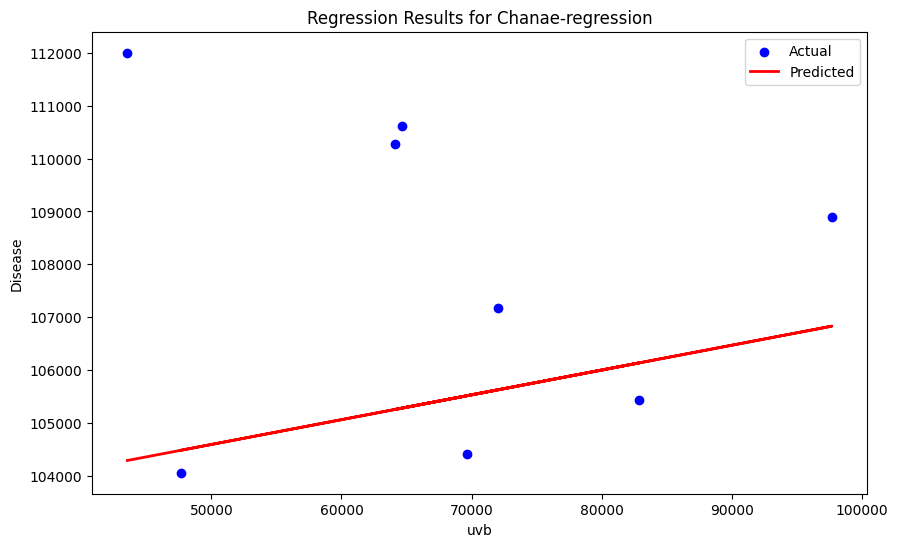

File: Chang-Phueak-regression.xlsx
Mean Squared Error: 15132985.415455064
R^2 Score: -0.876013850103903


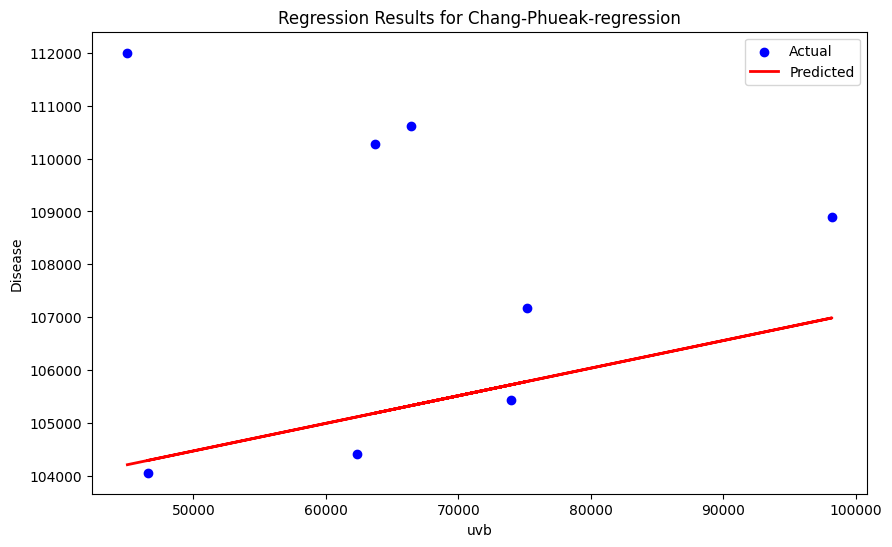

File: Du-Song-Yo-regression.xlsx
Mean Squared Error: 15414946.453797098
R^2 Score: -0.9109681435626884


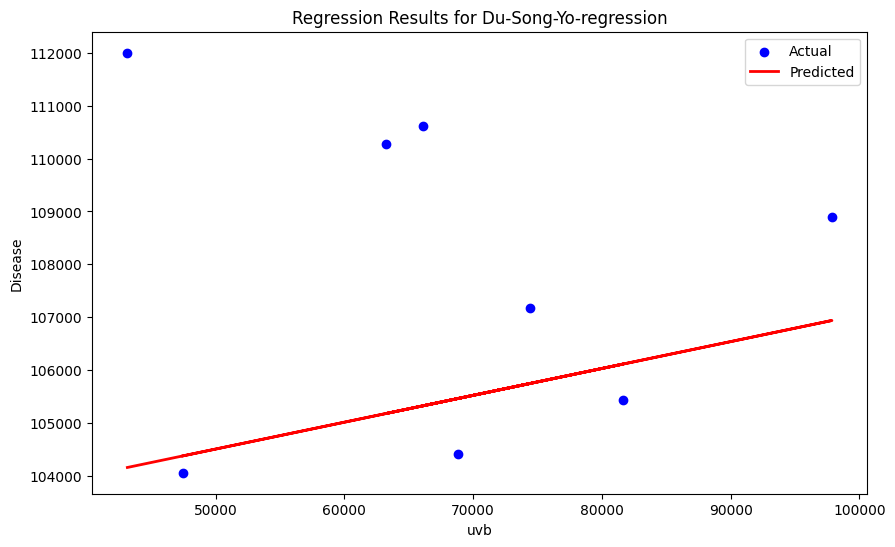

File: Phadung-Mat-regression.xlsx
Mean Squared Error: 15114228.44877629
R^2 Score: -0.873688576649309


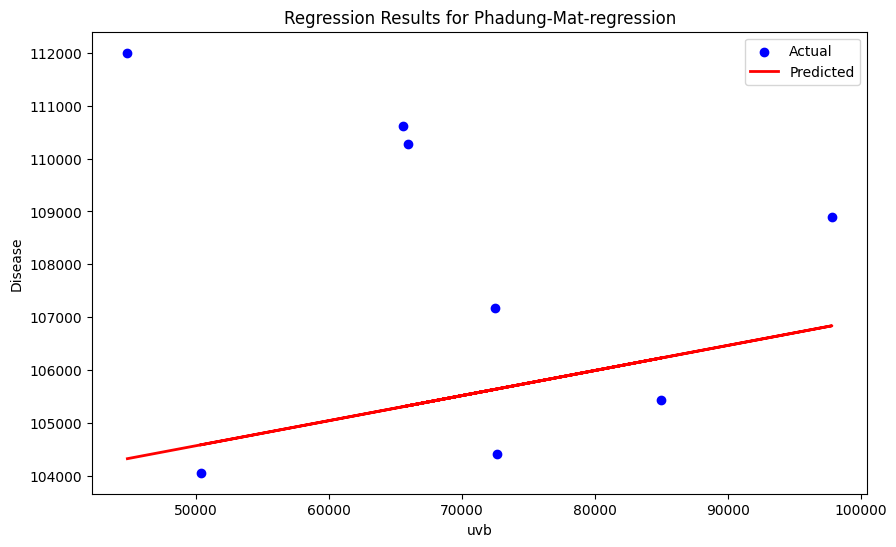

Correlation between durationOfDay and disease: 0.2263348764313065


In [4]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Directory settings
target = '../Chanae-regression/season'
# sunny rainy winter
output_dir = '../Chanae-regression/2023/test'
# 'uvb','d2m','RH','minTemp','maxTemp','meanTemp','tp','WS','durationOfDay'
data_plot = 'uvb'
plots_dir = os.path.join(output_dir, 'plots'+f'/{data_plot}')
os.makedirs(output_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

# Date settings
start_date = '2023-12-18'
start_date = pd.to_datetime(start_date)
end_date = start_date + pd.Timedelta(days=35)

evaluation_results = []

for file in os.listdir(target):
    df = pd.read_excel(os.path.join(target, file))
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
    
    # Filter data within the specified date range
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)].copy()


    # 'uvb','d2m','RH','minTemp','maxTemp','meanTemp','tp','WS'
    # Prepare data for regression
    X = filtered_data[[data_plot]]
    y = filtered_data['disease']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Perform linear regression on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate performance metrics on the test set
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the evaluation results
    evaluation_results.append({
        'File': file,
        'Mean Squared Error': mse,
        'R^2 Score': r2,
    })
    
    print(f"File: {file}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
    plt.xlabel(data_plot)
    plt.ylabel('Disease')
    plt.title(f'Regression Results for {file.split('.')[0]}')
    plt.legend()
    # plt.show()

    plot_path = os.path.join(plots_dir, f'{file}_regression_plot.png')
    plt.savefig(plot_path)
    plt.show()
    

# Save the evaluation results to an Excel file

evaluation_df = pd.DataFrame(evaluation_results)
correlation = filtered_data['uvb'].corr(filtered_data['disease'])
print(f'Correlation between durationOfDay and disease: {correlation}')

evaluation_df_path = os.path.join(plots_dir,'evaluation-results.xlsx')
evaluation_df.to_excel(evaluation_df_path, index=False, engine='openpyxl')
